In [122]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = 15 #fig_width_pt*inches_per_pt  # width in inches
fig_height = 11 #fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 10,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

# --------------- Latex Plot Beautification --------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
from calc_global_precip import calc_global_precip
from precip_model import precip_model
from GLD_file_tools import GLD_file_tools
from plotting import plot_flux_basemap
from plotting import plot_flux_polar_4up
import matplotlib.pyplot as plt
import datetime


In [3]:
db_file = "db_agu2016_kp0_full.pkl"

in_lat_grid  = np.arange(15, 55, 1);
out_lat_grid = np.arange(-60,60, 1);
out_lon_grid = np.arange(-10, 10, 1);
time_grid = np.arange(0, 20, 0.1);

print "Setting up model stuff..."
p = precip_model(database=db_file, cumsum=True)
p.precalculate_gridded_values(in_lat_grid, out_lat_grid, out_lon_grid, time_grid)

Setting up model stuff...
Precalculating...


In [110]:
from plotting import plot_flux_basemap

gld = GLD_file_tools(os.path.join(os.path.expanduser("~"),'GLD_mount'), prefix='GLD')
window_time = 320 # seconds to look back

in_time = datetime.datetime(2015, 8, 11, 2, 0, 0)

map_lats = np.arange(-90, 90, 1)
map_lons = np.arange(-180, 180, 1)

p.sc.I0 = -10000

flux, flashes = calc_global_precip(p, gld, in_time, window_time, map_lats, map_lons)

print np.shape(p.precalculated)

print flashes


starting at 2015-08-11 02:00:00
18463 flashes (post-filter)
finished 2015-08-11 02:00:00
(40, 120, 20, 200)
[[  2.47458591e+01  -1.75740410e+01   1.70000000e+01   3.39849971e+02]
 [  3.23254559e+01  -3.79097551e+01   1.20000000e+01   3.39650681e+02]
 [  2.49218956e+01  -2.57572319e+01   1.80000000e+01   3.39639560e+02]
 ..., 
 [  3.21714914e+01  -3.75408573e+01  -1.50000000e+01   2.14712000e-01]
 [  4.37315191e+01  -1.90040180e+01   7.00000000e+00   1.93061000e-01]
 [  3.23600204e+01  -3.74826269e+01  -2.00000000e+01   1.49693000e-01]]


(64800,)
(64800,)
(64800,)


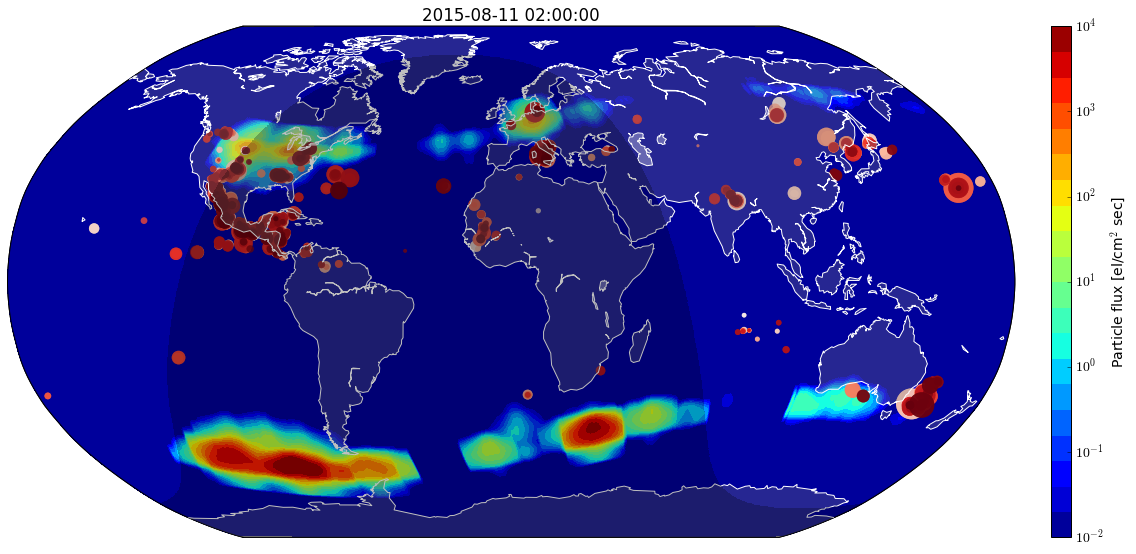

In [123]:
fig = plot_flux_basemap(flux/window_time, map_lats, map_lons, flashes,
                                    plottime=in_time, logscale=True, clims=[-2,4],
                                    num_contours=20, mode='counts')


plt.savefig('marble_%s.png'%in_time.isoformat(), ldpi=300, bbox_inches='tight')


In [33]:
# Plot monthly average from precomputed files:
pklpath = 'outputs/saves'
allfiles = os.listdir(pklpath)
filenames = sorted([f for f in allfiles if f.endswith('.pkl')])

print "we have %d files"%len(filenames)


we have 14175 files


we have 13791 files
5.11108076429
0: outputs_energy/saves/2015-08-03 00:30:00.pkl
1: outputs_energy/saves/2015-08-03 01:00:00.pkl
2: outputs_energy/saves/2015-08-03 01:30:00.pkl
3: outputs_energy/saves/2015-08-03 02:00:00.pkl
4: outputs_energy/saves/2015-08-03 02:30:00.pkl
5: outputs_energy/saves/2015-08-03 03:00:00.pkl
6: outputs_energy/saves/2015-08-03 03:30:00.pkl
7: outputs_energy/saves/2015-08-03 04:00:00.pkl
8: outputs_energy/saves/2015-08-03 04:30:00.pkl
9: outputs_energy/saves/2015-08-03 05:00:00.pkl
10: outputs_energy/saves/2015-08-03 05:30:00.pkl
11: outputs_energy/saves/2015-08-03 06:00:00.pkl
12: outputs_energy/saves/2015-08-03 06:30:00.pkl
13: outputs_energy/saves/2015-08-03 07:00:00.pkl
14: outputs_energy/saves/2015-08-03 07:30:00.pkl
15: outputs_energy/saves/2015-08-03 08:00:00.pkl
16: outputs_energy/saves/2015-08-03 08:30:00.pkl
17: outputs_energy/saves/2015-08-03 09:00:00.pkl
18: outputs_energy/saves/2015-08-03 09:30:00.pkl
19: outputs_energy/saves/2015-08-03 10:00:00.

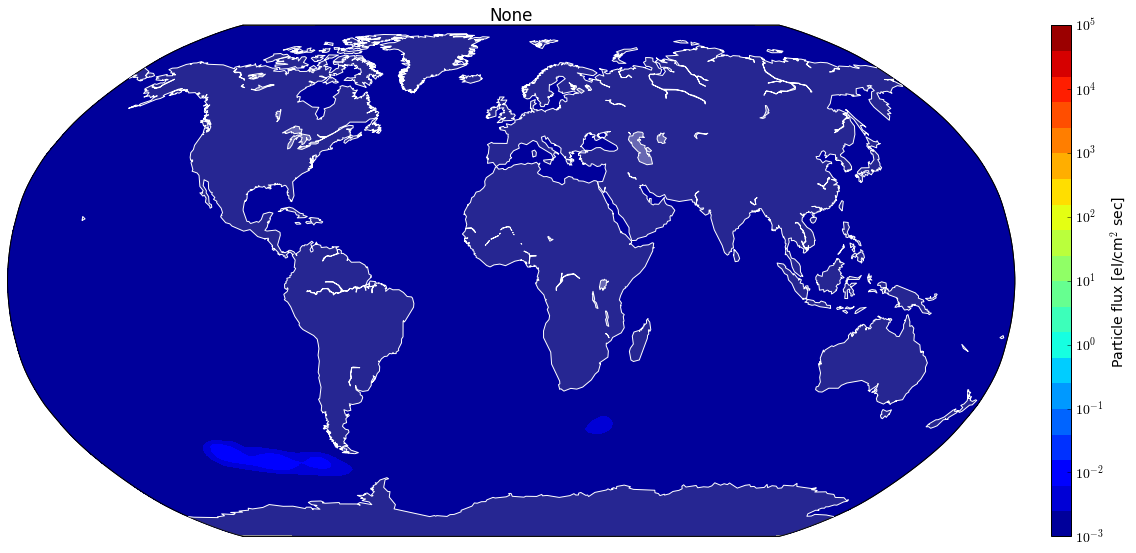

In [128]:
# Plot monthly average from precomputed files:
pklpath = 'outputs_energy/saves'
allfiles = os.listdir(pklpath)
filenames = sorted([f for f in allfiles if f.endswith('.pkl')])

print "we have %d files"%len(filenames)

dts = [datetime.datetime.strptime(s[0:-4],"%Y-%m-%d %H:%M:%S") for s in filenames]

starttime = datetime.datetime(2015,8,1,1,0,0)
stoptime  = datetime.datetime(2015,9,1,1,0,0)

R_e = 6378 # km^2
km2cm = 1e5 
millierg2joule=1e-10
D2R = np.pi/180.0
dLon = 1
dLat = 1

grid_lats = np.arange(-90,90, step=dLat)
grid_lons = np.arange(-180,180, step=dLon)

# Index where latitude grid is above zero
eq_ind = np.where(grid_lats > 0)[0][0]

todo = [t for t in dts if t > starttime and t < stoptime]

pwr_times     = np.zeros(len(filenames),dtype=datetime.datetime)
NH_vector = np.zeros(len(filenames),dtype=np.float32)
SH_vector = np.zeros(len(filenames),dtype=np.float32)

pwr_grid = np.zeros([len(grid_lats), len(grid_lons)])

# Area in km^2 of each latitude-longitude cell
A_lat = (R_e**2)*dLon*D2R*(np.sin(grid_lats*D2R) - np.sin((grid_lats - dLat)*D2R))

print (360.0/dLon)*np.sum(A_lat)*1e-8 # total area of earth ~5e8 km^2

for ind, in_time in enumerate(todo):
    filename = os.path.join(pklpath,'%s.pkl'%in_time.strftime('%Y-%m-%d %H:%M:%S'))
    with open(os.path.join(filename),'rb') as file:
        print "%d: %s"%(ind, filename)
        r = pickle.load(file)

#         timestr = r[0][0]
        data = r[1]
        
        NH_pwr = np.sum(np.dot(A_lat[eq_ind:], data[eq_ind:,:]))  # mErg/sec/(km^2/cm^2)
        NH_pwr_watts = NH_pwr*millierg2joule*(km2cm**2)
        
        SH_pwr = np.sum(np.dot(A_lat[0:eq_ind], data[0:eq_ind,:]))  # mErg/sec/(km^2/cm^2)
        SH_pwr_watts = SH_pwr*millierg2joule*(km2cm**2)

        NH_vector[ind] = NH_pwr_watts
        SH_vector[ind] = SH_pwr_watts
        
        
        
        # Rolling sum of the 2d data
        pwr_grid += data
        
fig = plot_flux_basemap(pwr_grid/window_time/len(todo), grid_lats, grid_lons,
                                    logscale=True, clims=[-3,5],
                                    num_contours=20, mode='counts')




2015-01-06 00:30:00.pkl
(64800,)
(64800,)
(64800,)


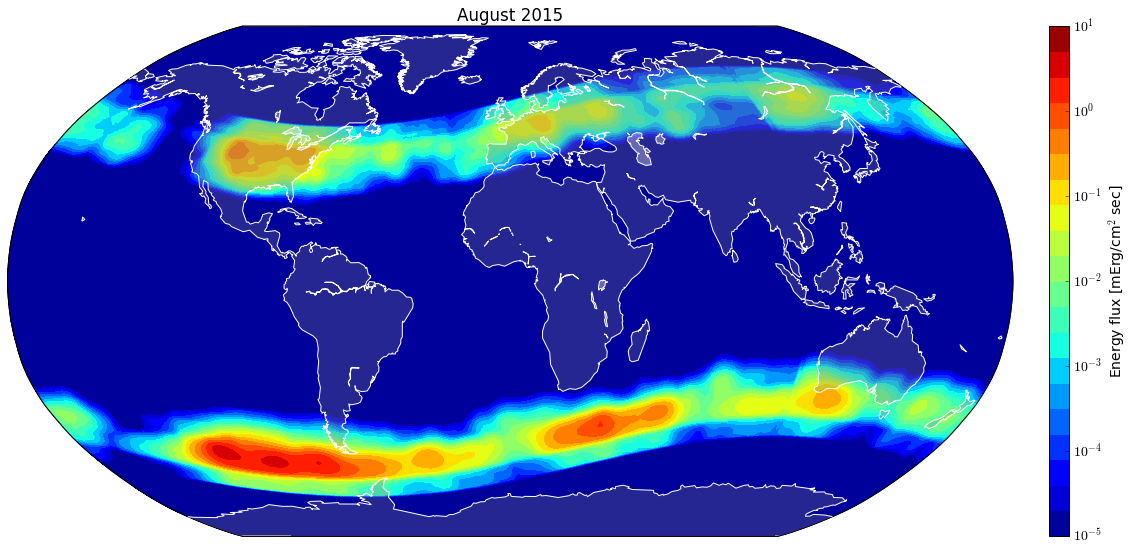

In [137]:
print filenames[0]
datetime.datetime.strptime(filenames[0][0:-4],"%Y-%m-%d %H:%M:%S")

fig = plot_flux_basemap(pwr_grid/len(todo), grid_lats, grid_lons,
                                    logscale=True, clims=[-5,1],
                                    num_contours=20, mode='energy', title='August 2015')

plt.savefig('Aug_energy_globe.png',bbox_inches='tight',ldpi=300)



In [ ]:
in_time = datetime.datetime(2015, 8, 11, 2, 0, 0)

flux, flashes = p.get_multiple_precip_at(in_time)

(180, 20)


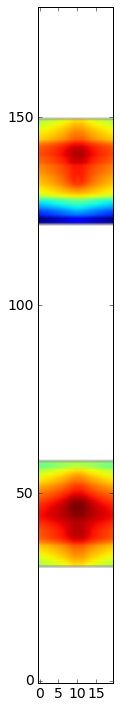

In [105]:
testdata = p.get_multiple_precip_at([30], np.arange(-90, 90, 1), np.arange(-10,10,1), [20]).squeeze()
print np.shape(testdata)
plt.figure()
plt.imshow(np.log10(testdata), origin='lower')

